# Libraries and Helper Functions

In [85]:
import pandas as pd
import numpy
from matplotlib import pyplot
%matplotlib inline

In [101]:
def plot_continuous(df, column_name, bins):
    no_readmission = df[df['READMISSION'] == False][column_name]
    readmission = df[df['READMISSION'] == True][column_name]

    pyplot.hist(no_readmission, bins, alpha=0.5, label='No Readmission')
    pyplot.hist(readmission, bins, alpha=0.5, label='Readmission')
    pyplot.xlabel(column_name)
    pyplot.ylabel('Count')
    pyplot.title(column_name + ' by Class')
    pyplot.legend(loc='upper right')
    pyplot.show()    

# Classify Readmission Status for Each Record

In [87]:
admissions = pd.read_csv('../mimic-code/buildmimic/postgres/mimic-data/ADMISSIONS.csv')

In [88]:
print(admissions.shape)
admissions.head()

(58976, 19)


,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [89]:
# get number of records for each subject id
subject_id_counts = admissions['SUBJECT_ID'].value_counts()

# mark all subject_ids with more than one record as case for readmission
admissions['READMISSION'] = admissions['SUBJECT_ID'].apply(lambda subject_id: subject_id_counts[subject_id] > 1)

In [90]:
# Only keep the first admission and drop any records where the patient died during the initial admission
main_df = admissions.drop_duplicates('SUBJECT_ID', keep = 'first')
main_df = main_df[main_df['DEATHTIME'].isnull()]

In [91]:
print(main_df.shape)
main_df.head()

(42115, 20)


,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,READMISSION
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1,False
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,True
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1,False
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1,False
5,26,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,V-TACH,0,1,False


# Format Admissions Features

#### Length of Stay

In [92]:
print(main_df['ADMITTIME'].max())
print(main_df['DISCHTIME'].max())
print(main_df['ADMITTIME'].min())
print(main_df['DISCHTIME'].min())

2206-05-30 00:51:00
2206-06-10 15:59:00
2100-06-07 19:59:00
2100-06-09 17:09:00


In [93]:
def adjust_years(date, decrease_factor):
    year_old = date[:4]
    year_new = str(int(year_old) - decrease_factor)
    date = date.replace(year_old, year_new)
    return date

main_df['ADMITTIME'] = main_df['ADMITTIME'].apply(lambda date: adjust_years(date, 200))
main_df['DISCHTIME'] = main_df['DISCHTIME'].apply(lambda date: adjust_years(date, 200))
main_df['ADMITTIME'] = pd.to_datetime(main_df['ADMITTIME'])
main_df['DISCHTIME'] = pd.to_datetime(main_df['DISCHTIME'])

In [94]:
main_df['DURATION_OF_STAY'] = main_df['DISCHTIME'] - main_df['ADMITTIME']
main_df['DURATION_OF_STAY'] = main_df['DURATION_OF_STAY'].dt.days * 24 + main_df['DURATION_OF_STAY'].dt.seconds * 1.0 / 3600

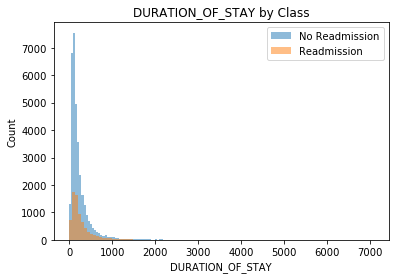

In [106]:
plot_continuous(main_df, 'DURATION_OF_STAY', 100)

#### Admission Type

In [107]:
main_df['ADMISSION_TYPE'].value_counts()

EMERGENCY    27185
NEWBORN       7767
ELECTIVE      6147
URGENT        1016
Name: ADMISSION_TYPE, dtype: int64